# 損失函數
機器學習中所有的算法都需要最⼤化或最⼩化⼀個函數，這個函數被稱為
「⽬標函數」。其中，我們⼀般把最⼩化的⼀類函數，稱為「損失函數」。
它能根據預測結果，衡量出模型預測能⼒的好壞
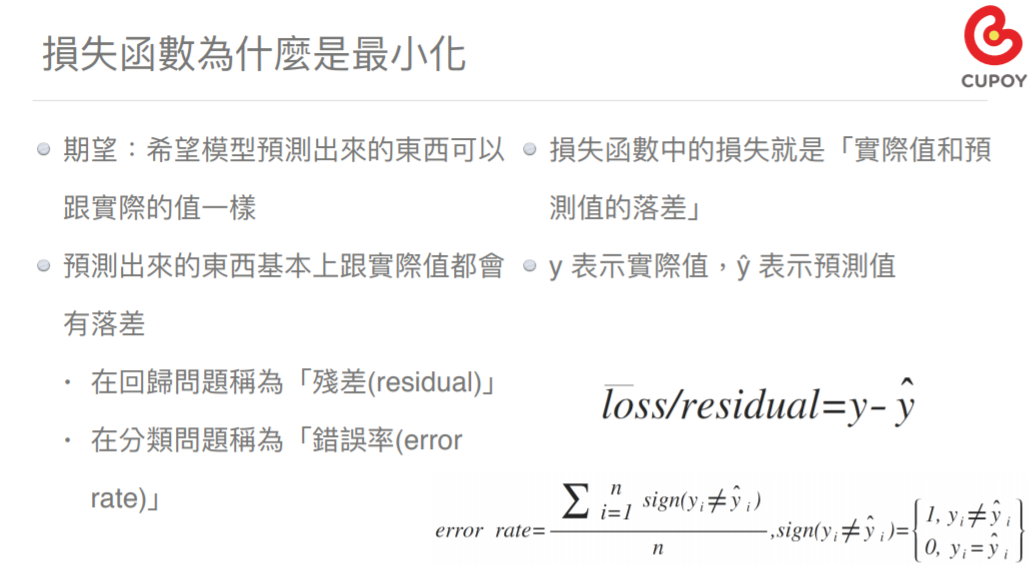
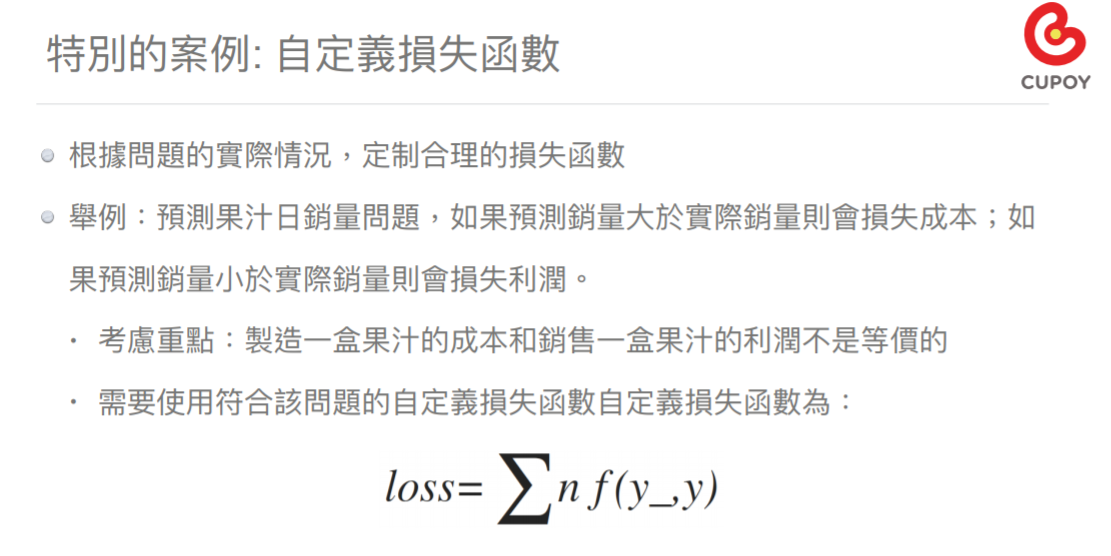
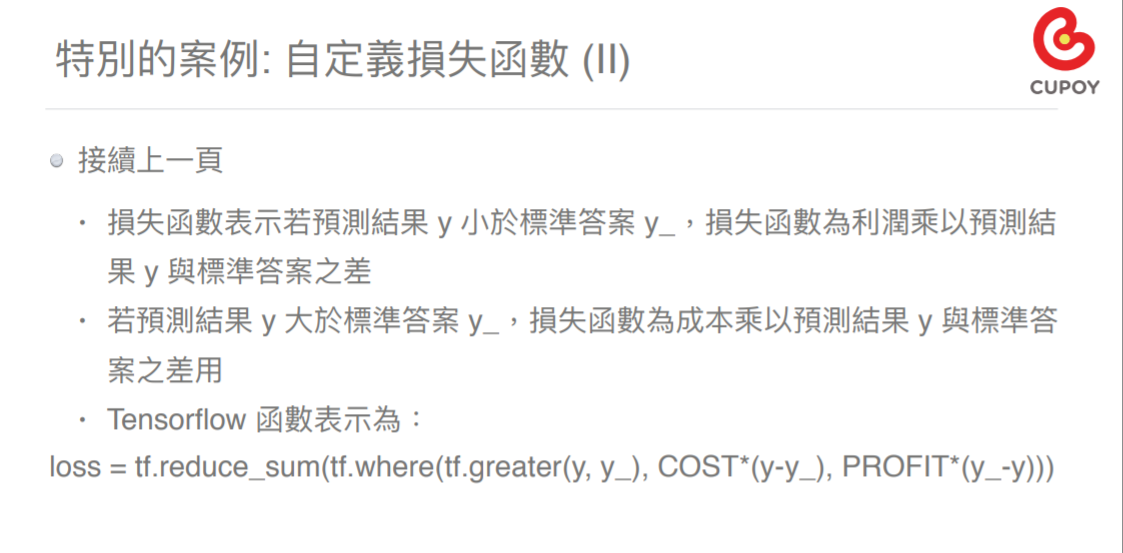

## Reference
[TensorFlow筆記-06-神經網絡優化-損失函數，自定義損失函數，交叉熵](https://blog.csdn.net/qq_40147863/article/details/82015360)

# 課程目標

利用Keras 的 CIFAR10 dataset 來驗證損失函數對於模型精確度的影響


# 範例重點: 
    
    模型架構的層數
    
    使用何種LOSS function

# 導入必要的libray

In [1]:
import keras
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

import tensorflow as tf
# 屏蔽 tensorflow 的 deprecated warning
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


Using TensorFlow backend.


In [2]:
from keras.backend.tensorflow_backend import set_session  
config = tf.ConfigProto()  
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU  
sess = tf.Session(config=config)  
set_session(sess)  # set this TensorFlow session as the default session for Keras.

# 資料準備

In [3]:
#取得Keras CIFAR10 Dataset, 並分成Training 與 Test set
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化, 並設定 data array 為浮點數
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE, 並查看維度資訊
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [12]:
def build_model(output_activation):
    # 宣告採用序列模型
    model = Sequential()
    
    #卷積層1與池化層1
    model.add(Conv2D(filters=32,kernel_size=(3,3),
                     input_shape=(32, 32, 3), 
                     activation='relu', 
                     padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #卷積層2與池化層2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                     activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #卷積層3與池化層3
    model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                     activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #卷積層4與池化層4
    model.add(Conv2D(filters=256, kernel_size=(3, 3), 
                     activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #建立神經網路(平坦層、隱藏層、輸出層)
    model.add(Flatten())
    #建立全網路連接層
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    #建立輸出層
    model.add(Dense(10, activation=output_activation))
    #檢查model 的STACK
    print(model.summary())
    return model

In [13]:
model = build_model(output_activation='softmax')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 256)         295168    
__________

# 載入之前訓練的模型

In [14]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [15]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [16]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

#[validation_split = 0.2] validation_split：在0和1之間浮動。用作驗證數據的訓練數據的分數。
#該模型將訓練數據的這一部分分開，不會對其進行訓練，並將在每個時期結束時評估該數據的損失和任何模型指標。
#[batch_size]：整數或None。每個梯度更新的樣本數。指定，batch_size為128

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 10s 274us/step - loss: 1.6272 - acc: 0.3917 - val_loss: 1.3395 - val_acc: 0.5018
Epoch 2/12
37500/37500 [==============================] - 7s 178us/step - loss: 1.1546 - acc: 0.5809 - val_loss: 1.0237 - val_acc: 0.6381
Epoch 3/12
37500/37500 [==============================] - 7s 181us/step - loss: 0.9266 - acc: 0.6707 - val_loss: 0.9458 - val_acc: 0.6706
Epoch 4/12
37500/37500 [==============================] - 7s 178us/step - loss: 0.7759 - acc: 0.7258 - val_loss: 0.8325 - val_acc: 0.7077
Epoch 5/12
37500/37500 [==============================] - 7s 179us/step - loss: 0.6497 - acc: 0.7711 - val_loss: 0.7925 - val_acc: 0.7305
Epoch 6/12
37500/37500 [==============================] - 7s 179us/step - loss: 0.5381 - acc: 0.8121 - val_loss: 0.8447 - val_acc: 0.7152
Epoch 7/12
37500/37500 [==============================] - 7s 178us/step - loss: 0.4434 - acc: 0.8442 - val_loss: 0.8393 -

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.figure(figsize=(10, 4))
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

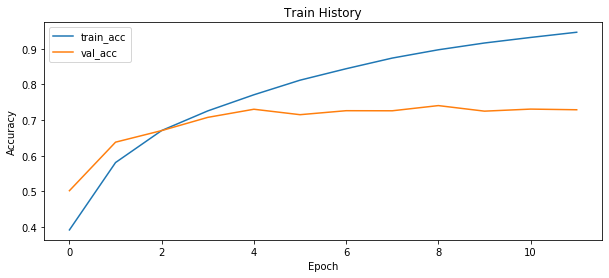

In [18]:
show_train_history('acc','val_acc')

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary_crossentropy"
    查看Train/test accurancy and loss rate
    

In [20]:
import gc
model = None
gc.collect()

2768

In [21]:
model_binary = build_model(output_activation='sigmoid')
model_binary.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
train_history = model_binary.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 4, 4, 256)         295168    
__________

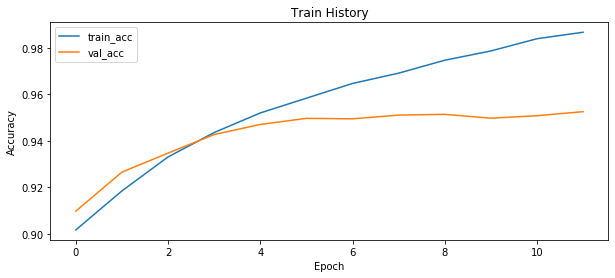

In [22]:
show_train_history('acc','val_acc')